# Income Prediction

This is a 2-class classification problem (income **high** or **low**). There are 32561 instances and 14 features. Target value is the last (income) column, 0 for low income, 1 for high income. There are no missing values, but some values are categorical (like education and marital status). They need to be converted to numerical values (integers) to be processed by most machine learning algorithms.


 You can download the dataset as follows. Using any other income prediction dataset from Internet sources is NOT allowed.

In [1]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
url =  "./DATA602repo/income2.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
import pandas as pd
data = pd.read_csv(url, header=None, names=names)


Cloning into 'DATA602repo'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 77 (delta 9), reused 7 (delta 3), pack-reused 54
Receiving objects: 100% (77/77), 9.09 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (25/25), done.



You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization and feature extraction/selection (if relevant).

In [2]:
print(data)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training data
X_preprocessed = preprocessor.fit_transform(X)

# Convert sparse matrix to DataFrame
preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=preprocessor.get_feature_names_out())

# Display the first few rows of the preprocessed dataset
print("\nPreprocessed Data (First few rows):")
print(preprocessed_df)


Preprocessed Data (First few rows):
       cat__workclass_ ?  cat__workclass_ Federal-gov  \
0                    0.0                          0.0   
1                    0.0                          0.0   
2                    0.0                          0.0   
3                    0.0                          0.0   
4                    0.0                          0.0   
...                  ...                          ...   
32556                0.0                          0.0   
32557                0.0                          0.0   
32558                0.0                          0.0   
32559                0.0                          0.0   
32560                0.0                          0.0   

       cat__workclass_ Local-gov  cat__workclass_ Never-worked  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3             

In [16]:
from sklearn.preprocessing import StandardScaler
X = data.drop('income', axis=1)
y = data['income']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([('preprocessor', preprocessor), ('clf', model)])

# Define parameters for grid search
param_grid = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'clf__n_estimators': [100, 200, 300]},
    'Support Vector Machine': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
}

# Grid search with cross-validation
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

# Evaluate models
for name, model in best_estimators.items():
    print(f"Model: {name}")
    print(classification_report(y_test, model.predict(X_test)))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4942
           1       0.70      0.53      0.60      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.67      0.57      0.61      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4942
           1       0.70      0.52      0.60      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.72      0.74      6

/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


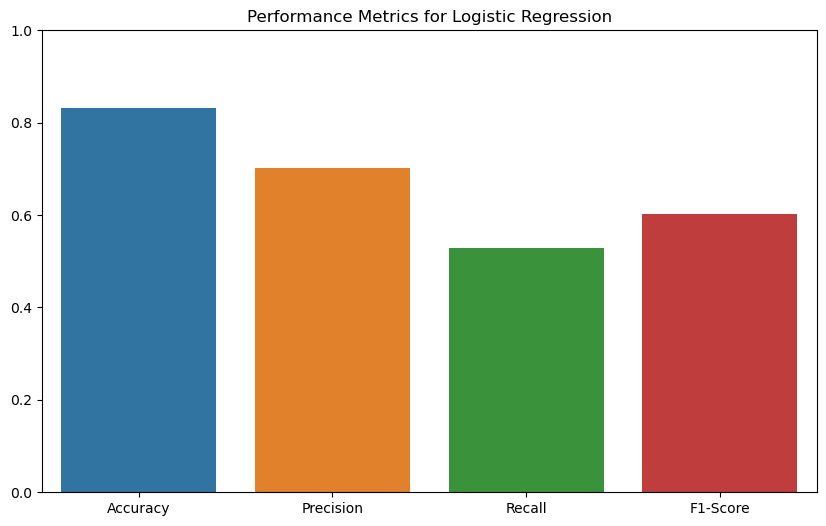

/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


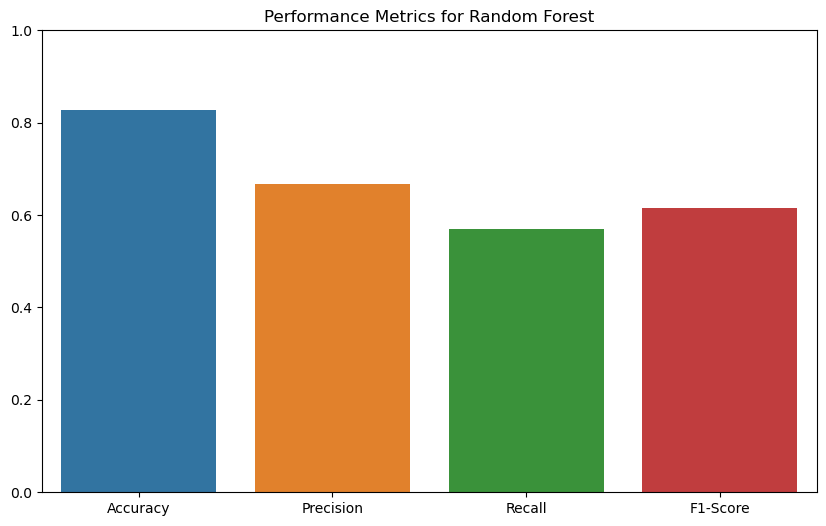

/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


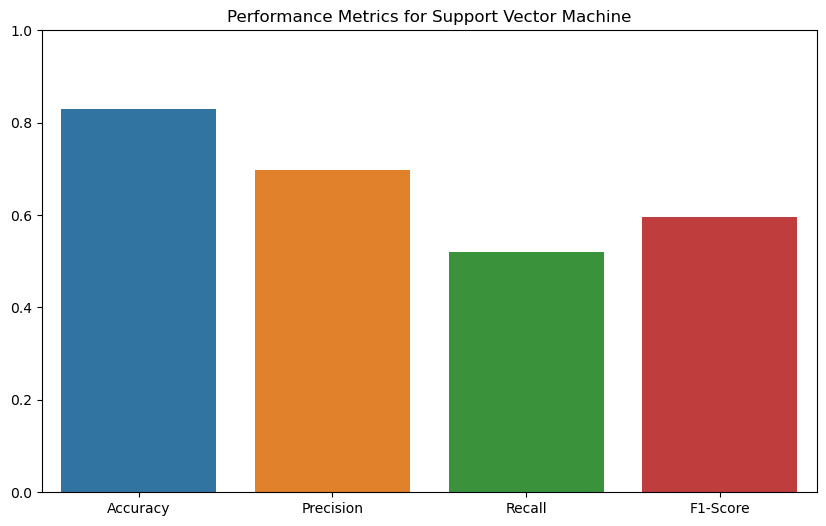

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate and plot performance metrics
def plot_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Create a bar plot for each metric
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score'], y=[accuracy, precision, recall, f1])
    plt.title(f'Performance Metrics for {model_name}')
    plt.ylim(0, 1)
    plt.show()

# Evaluate and plot metrics for each model
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    plot_metrics(model_name, y_test, y_pred)
